In [1]:
# Install the plaidml backend
import plaidml.keras
plaidml.keras.install_backend()

In [2]:
from PIL import Image
import os

# import cv2
import numpy as np

import matplotlib.pyplot as plt
import random
import numpy

In [3]:
def DatasetPrep(dir_dataset):
    x = []
    y = []
    size = 75, 75

    for category in keys:
        dir_root = dir_dataset
        photo_path = os.listdir(dir_root + category)
        for photo in photo_path:
            img = Image.open(dir_root + category + '/' + photo)
            img.thumbnail(size, Image.ANTIALIAS)
            img = numpy.array(img)
            
            x.append(img)
            y.append(categories[category])

    # Keep copy of original datasets
    orig_x = x
    orig_y = y
            
    # check for any pictures that are not shape (150, 150)
    off_images = []
    
    # get indices of all the images that are not (150, 150)
    for i in range(0,len(x)):
        if x[i].shape == (75, 75, 3):
            pass
        else:
            off_images.append(i)

    temporary_x = np.delete(x, off_images)
    temporary_y = np.delete(y, off_images)
    
#     off_images = []

#     for i in range(0,len(temporary_x)):
#         if temporary_x[i].shape == (75,75, 3):
#             pass
#         else:
#             off_images.append(i)

    x = temporary_x
    y = temporary_y

    temp_x = np.array([temp.tolist() for temp in np.array(x)])
    temp_y = np.array(y)

    x = temp_x
    x = np.reshape(x, (x.shape[0], x[0].shape[0], x[0].shape[1], 3))
    
    y = temp_y
    
    return (x, y, orig_x, orig_y, off_images)

In [37]:
def DatasetPrepPrediction(dir_dataset):
    x = []
    size = 75, 75

    dir_root = dir_dataset
    photo_path = os.listdir(dir_root)
    for photo in photo_path:
        img = Image.open(dir_root + '/' + photo)
        img.thumbnail(size, Image.ANTIALIAS)
        img = numpy.array(img)

        x.append(img)

    # Keep copy of original datasets
    orig_x = x
            
    # check for any pictures that are not shape (150, 150)
    off_images = []
    
    # get indices of all the images that are not (150, 150)
    for i in range(0,len(x)):
        if x[i].shape == (75, 75, 3):
            pass
        else:
            off_images.append(i)

    temporary_x = np.delete(x, off_images)
    
#     off_images = []

#     for i in range(0,len(temporary_x)):
#         if temporary_x[i].shape == (75,75, 3):
#             pass
#         else:
#             off_images.append(i)

    x = temporary_x

    temp_x = np.array([temp.tolist() for temp in np.array(x)])

    x = temp_x
    x = np.reshape(x, (x.shape[0], x[0].shape[0], x[0].shape[1], 3))
    
    return (x, orig_x, off_images)

In [38]:
keys = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [39]:
values = [1, 2, 3, 4, 5, 6]

In [40]:
categories = dict(zip(keys,values))
value_pair = dict(zip(values, keys))

In [41]:
dir_train = 'seg_train/'
dir_test = 'seg_test/'

# Importing the Data

In [42]:
x_train, y_train, orig_x_train, orig_y_train, off_images_train = DatasetPrep(dir_train)
x_test, y_test, orig_x_test, orig_y_test, off_images_test = DatasetPrep(dir_test)

In [43]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13986, 75, 75, 3) (13986,)
(2993, 75, 75, 3) (2993,)


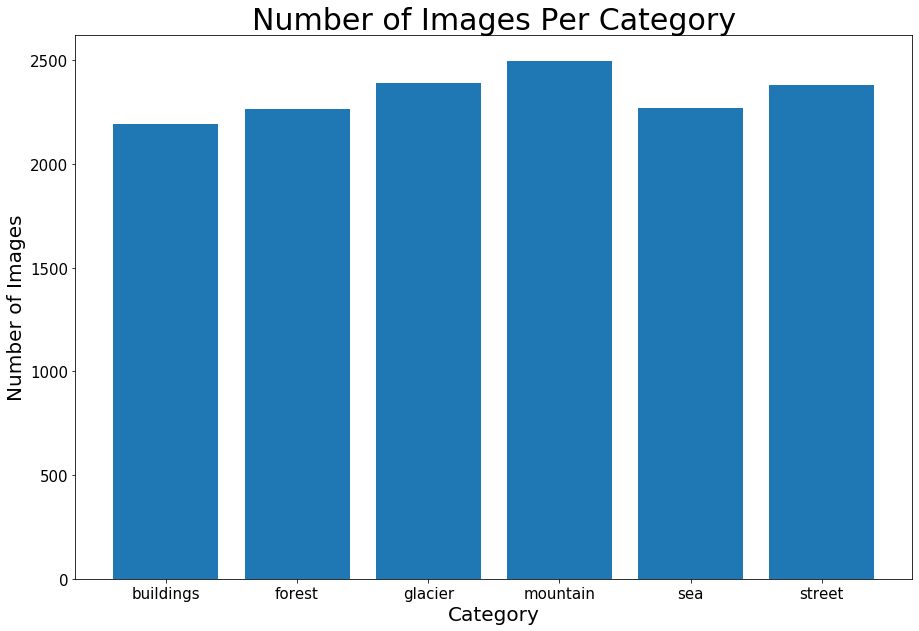

In [94]:
import pandas as pd
# list(pd.Series(y_train).value_counts().sort_index().index)
image_count = list(pd.Series(y_train).value_counts().sort_index().values)
dict(zip(keys,image_count))

plt.figure(figsize = (15,10))
plt.bar(keys, image_count)
plt.title('Number of Images Per Category', fontsize=30)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Number of Images', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# Analysis of original datasets

In [10]:
len(orig_x_train), len(orig_y_train)

(14034, 14034)

In [11]:
len(orig_x_test), len(orig_y_test)

(3000, 3000)

In [12]:
len(orig_x_train), len(orig_y_train), len(off_images_train)

(14034, 14034, 48)

In [13]:
len(orig_x_test), len(orig_y_test), len(off_images_test)

(3000, 3000, 7)

# Analysis of Unlabeled Datasets

In [9]:
dir_unlabeled = 'seg_pred/'
x_pred, orig_x_pred, off_images_pred = DatasetPrepPrediction(dir_unlabeled)

In [11]:
len(orig_x_pred), len(off_images_pred)

(7301, 13)

In [12]:
print(x_pred.shape)

(7288, 75, 75, 3)


# Transforming data to proper format to input into model

In [25]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [26]:
num_classes = len(values)+1
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)

num_classes_test = len(np.unique(y_test))+1
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes_test)

In [27]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
INPUT_SHAPE = (img_rows, img_cols,3)